In [63]:
import numpy as np
import pandas as pd
# ColumnTransformer class to handle data variety into one object
from sklearn.compose import ColumnTransformer

# a pipeline to chain operations
from sklearn.pipeline import Pipeline

# preprocessing operations
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ML-models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [64]:
wine = pd.read_csv("winequality-red.csv", sep=';')
wine.head(3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [65]:
print(wine.isnull().sum())  # check for missing values


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [66]:
wine.value_counts("fixed acidity")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
12.1     1
4.7      1
5.5      1
4.9      1
15.9     1
Length: 96, dtype: int64

In [67]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


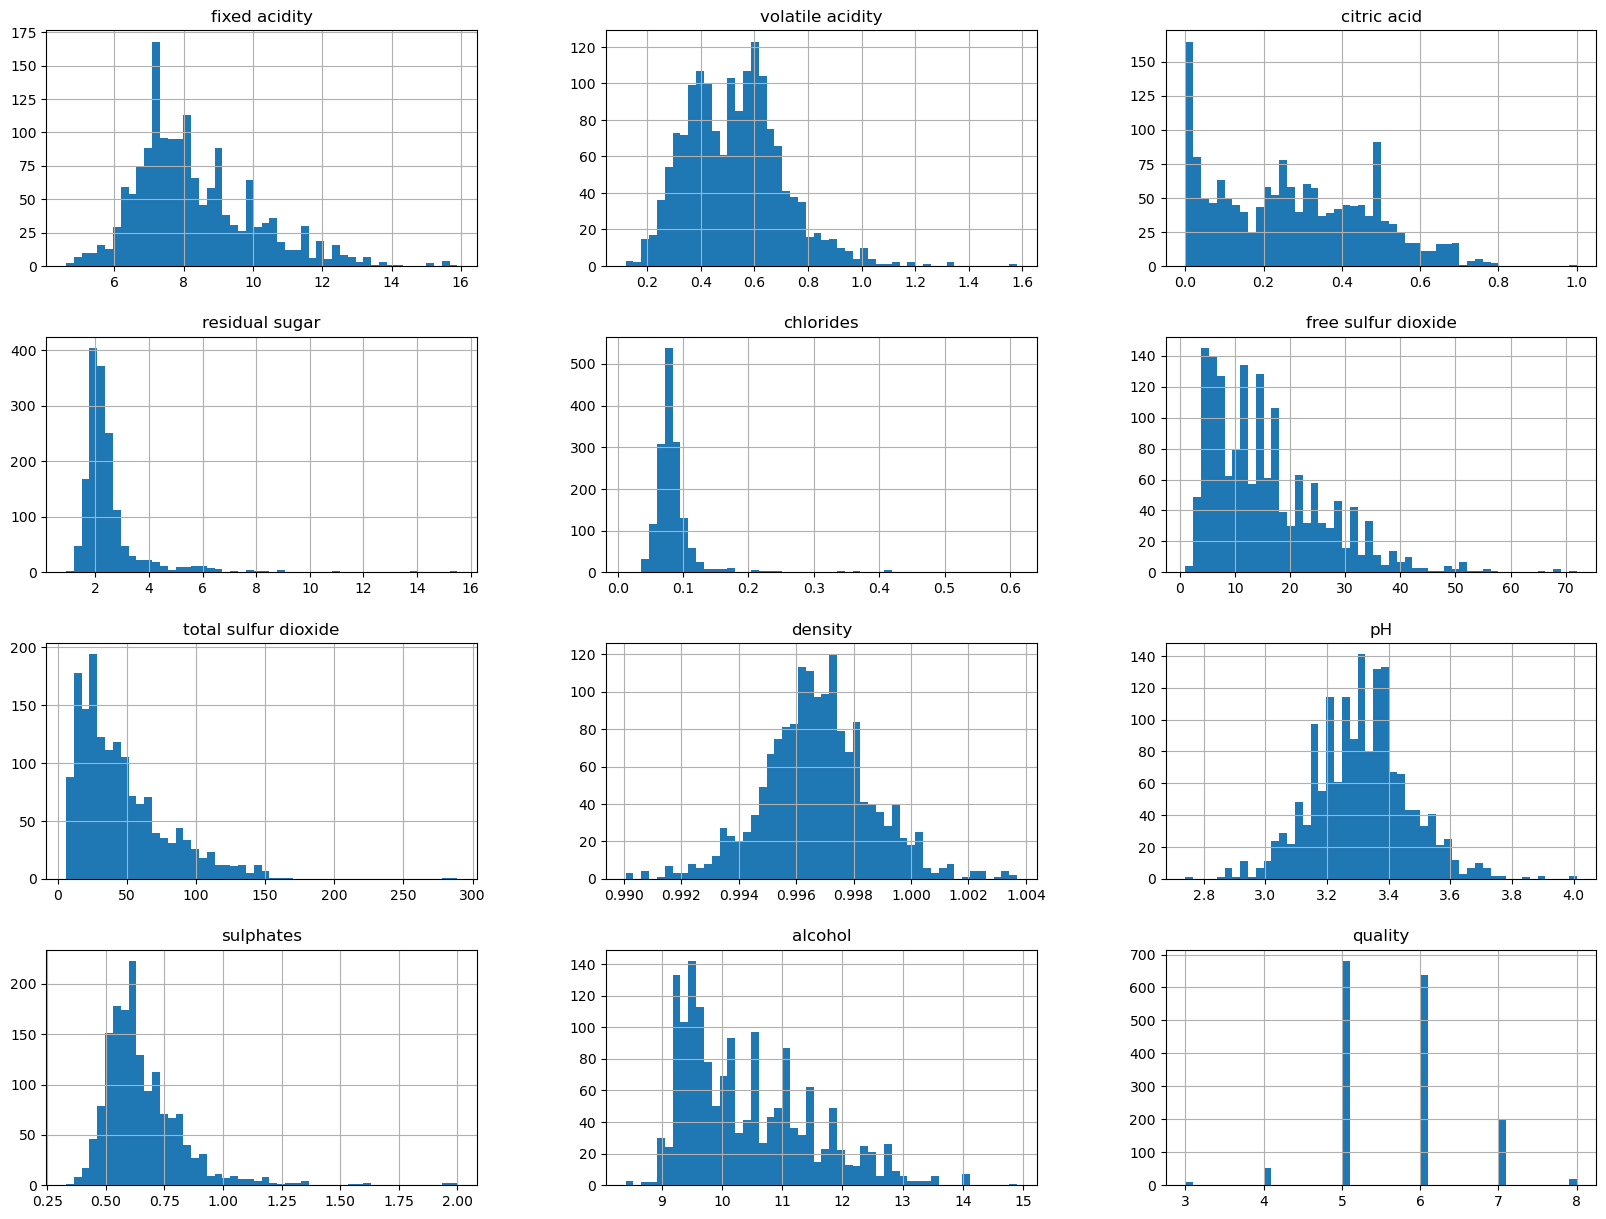

In [68]:
import matplotlib.pyplot as plt
wine.hist(bins=50,figsize=(20,15))
plt.show()

# Le mieux dans les graphes c'est avoir des gaussiennes pour l'apprentissage

# Dire qu'on remarque que les unités des variables sont très hétérogene donc on va devoir scaling (centre et reduire)

In [69]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


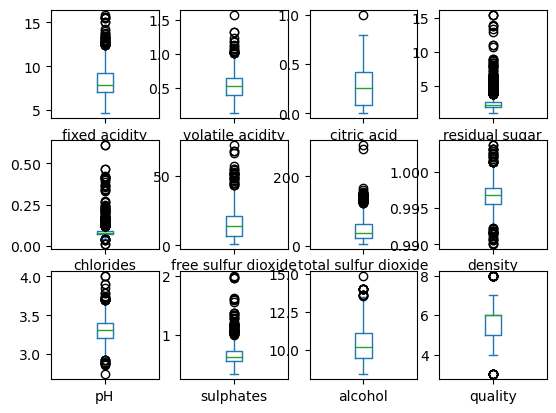

In [70]:
wine.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()


Les points aux etremité c'est les valeurs aberrante.
La ligne au milieu du rectangle c'est la médiane.
La distances de la ligne du milieu entre les cote du rectangle c'est la répartition des variable selon la médiane. La taille du rectangle c'est la variance.


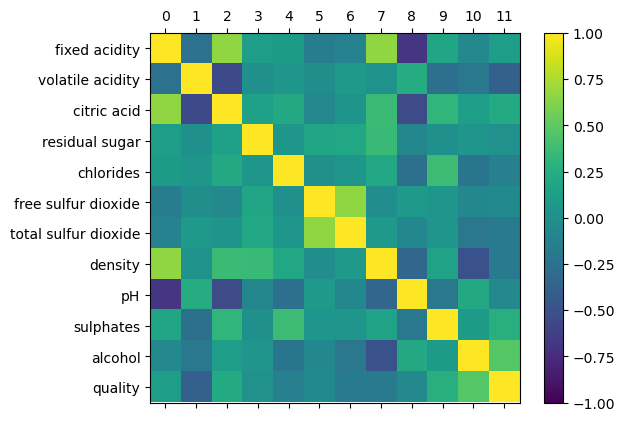

In [71]:
import numpy
correlations = wine.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,12,1)
names= wine.head(0)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

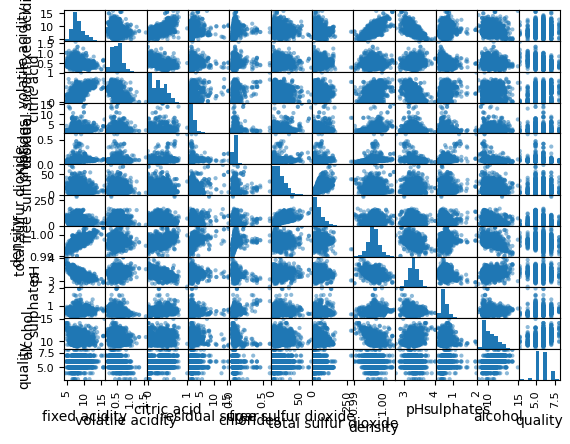

In [72]:
from pandas.plotting import scatter_matrix
scatter_matrix(wine)
plt.show()

In [73]:
#import classes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#create the pipeline
#centrer et reduire avec StandardScaler car cela n'est pas deja fait avec la PCA dans sklearn
#centrer et reduire sert à harmoniser et detecter les valeurs aberrantes

#la PCA sert à retirer des variables en correllation

#Le parametre entropy sert à mesure la pureté des classification (classif parfaite = entropy à 0)
#n estimator c'est le nombre d'arbres (pas plus de 10)
#max_depht c'est la profondeur max des arbres (le nombre de features interressante car c'est le nombre de test)
#random_state sert pour reproduire l'experience en partant toujours depuis la meme data

#Ces parametres tu les trouves avec la gridsearch
#La bagging c'est le vote entre plusieurs prediction
#Le boosting c'est faire des decisions tree en série, donc on se base sur les prediction precedente

ML_pipeline = make_pipeline(StandardScaler(),
                        PCA(n_components=9),
                        RandomForestClassifier(n_estimators=1000, max_depth=12, criterion='entropy',random_state=1))

In [74]:
x=wine.loc[:, 'fixed acidity':'alcohol']
y=wine.loc[:, 'quality']

In [75]:

from sklearn.model_selection import train_test_split

#stratify = y dis au train_test de bien à voir dans les données de test un peu de tous les y qui existent (quality 1, 2 ...)
#utile pour pas test sur juste quelques data

#le test size est presque toujours à 0,20, parfois 0,15 et 0,25 si beaucoup de donnée

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=42)


In [76]:
ML_pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=9)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=12,
                                        n_estimators=1000, random_state=1))])

In [77]:
y_pred = ML_pipeline.predict(X_test)
test_acc = ML_pipeline.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')
print(y_test-y_pred)

Test accuracy: 0.709
963     0
475     0
1       0
329    -1
149     1
       ..
1173    0
827     0
356    -1
1287   -1
789     0
Name: quality, Length: 320, dtype: int64


In [78]:
from sklearn import preprocessing

group_names = ['bad', 'good']
catego = pd.cut(y, bins = 2, labels = group_names)
catego
label_quality = preprocessing.LabelEncoder()

# Bad becomes 0 and good becomes 1
wine['quality'] = label_quality.fit_transform(catego)
print(wine['quality'].value_counts())
print(wine['quality'].head(20))
y.head(20)


1    855
0    744
Name: quality, dtype: int64
0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    1
Name: quality, dtype: int32


0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
Name: quality, dtype: int64

In [79]:
x=wine.loc[:, 'fixed acidity':'alcohol']
y=wine.loc[:, 'quality']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=1)
ML_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=9)),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=12,
                                        n_estimators=1000, random_state=1))])

In [80]:
y_pred = ML_pipeline.predict(X_test)
test_acc = ML_pipeline.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')
print(y_test-y_pred)

Test accuracy: 0.806
97      0
1081    0
1484   -1
1571    0
107     0
       ..
222     0
525     0
1460    0
899     0
754     1
Name: quality, Length: 320, dtype: int32


In [81]:
ML_pipeline2 = make_pipeline(StandardScaler(),
                        RandomForestClassifier(criterion='entropy', n_estimators=1000,max_depth=12, random_state=1))

ML_pipeline2.fit(X_train, y_train)

y_pred = ML_pipeline2.predict(X_test)
test_acc = ML_pipeline2.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.791
